# [9660] Principal Component Analysis 0
Data file:
* sklearn : iris

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/15/24 13:51:22


### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

### Load data

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# Setup the independent and dependent variables
X = iris.data
y = iris.target

### Prepare data for PCA

In [ ]:
# Instantiate StandardScalar
scaler = StandardScaler()

# Standardize the independent variables
X_scaled = scaler.fit_transform(X)

### Perform PCA (not really)

In [ ]:
X.shape

(150, 4)

In [ ]:
# Apply PCA (keep all 4 features to see the variance among the independent variables)
pca_1 = decomposition.PCA(n_components=4, random_state=42)

In [ ]:
# NOTE: The pca.fit method fits the PCA model to the data but DOES NOT transform it
#  - It computes the principal components and stores the necessary parameters
#    (eigenvalues, eigenvectors, etc.) internally
#  - It does not apply the dimensionality reduction to the data
#  - It is used to examine the components or eigenvalues without transforming the
#    data immediately
X_pca_1 = pca_1.fit(X_scaled)

### Compute cumulative variance

In [ ]:
# Calculate explained variance ratio for each principal component
explained_variance = pca_1.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [ ]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

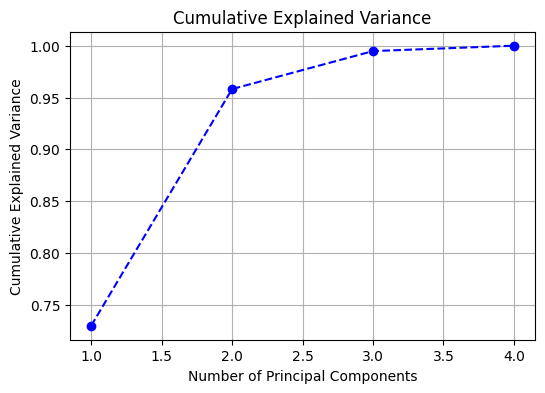

In [ ]:
# Visualize cumulative explained variance
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

### Perform Principal Component Analysis (PCA)

In [ ]:
# Apply PCA to reduce the independent variables to N components
pca_2 = decomposition.PCA(n_components=2, random_state=42)

In [ ]:
# NOTE: The pca.fit_transform method fits the PCA model to the data and directly
#       applies the dimensionality reduction transformation
#  - Performs the same fitting process as pca.fit iAND mmediately transforms the
#    data into the lower-dimensional space defined by the principal components
#  - It is used to fit the PCA model and transform the data in a single step
X_pca_2 = pca_2.fit_transform(X_scaled)

In [ ]:
X_pca_2.shape

(150, 2)

In [ ]:
X_pca_2

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

#### Calculate variance ratios for each principal component

In [ ]:
ex_variance = np.var(X_pca_2, axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(f"1st component ratio = {round(ex_variance_ratio[0],4)}")
print(f"2nd component ratio = {round(ex_variance_ratio[1],4)}")

1st component ratio = 0.7615
2nd component ratio = 0.2385


### Plot the principal components against their target classes

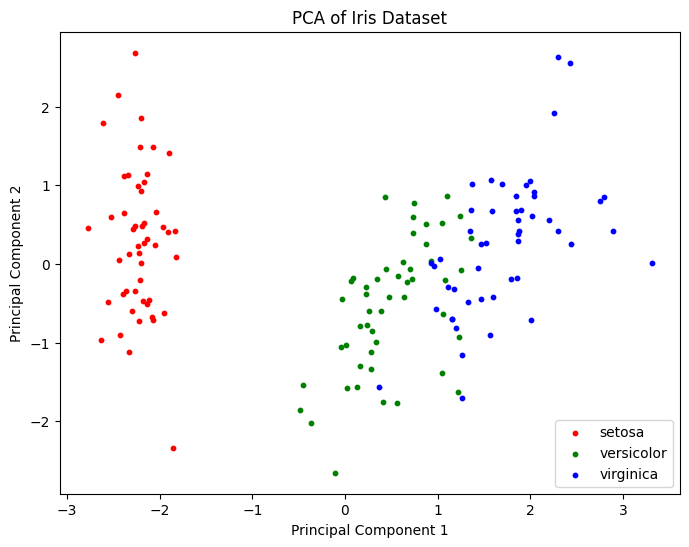

In [ ]:
# Create dataframe of principal components
df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'])
df = pd.concat([df, pd.DataFrame(y, columns=['target'])], axis=1)

# Visualize principal components
plt.figure(figsize=(8,6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = df['target'] == target
    plt.scatter(df.loc[indices, 'PC1'],
                df.loc[indices, 'PC2'],
                c=color,
                s=10)
plt.legend(iris.target_names)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

#### Review each original feature's contribution to each principal component

In [ ]:
pca_2.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

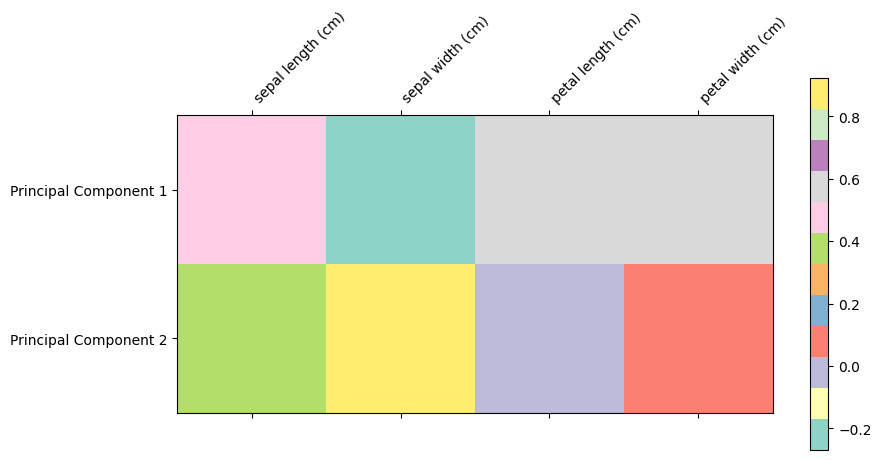

In [ ]:
plt.matshow(pca_2.components_, cmap='Set3')
plt.yticks([0,1], ['Principal Component 1','Principal Component 2'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(iris.feature_names)), iris.feature_names,
           rotation=45, ha='left')
plt.show()